In [1]:
# This notebook contains:
#
# Here we take 500K failed jobs and 375K successful jobs

In [2]:
# Connect to MYSQL database

hostname = 'localhost'
username = 'a1singh'
password = 'sdsc1234'
database = 'belle2'

import pandas as pd
import numpy as np

In [3]:
import sys
print(sys.executable)
print(sys.version)

/data/home/a1singh/anaconda3/envs/keras/bin/python
3.5.4 |Anaconda, Inc.| (default, Nov 20 2017, 18:44:38) 
[GCC 7.2.0]


In [4]:
import pymysql
from IPython.display import display, HTML

conn = pymysql.connect(host=hostname, user=username, passwd=password, db=database)
print(conn)

In [5]:
query = "show tables"
df = pd.read_sql(query, conn)
tables = df['Tables_in_belle2'].tolist()

In [6]:
%%time
# Total number of rows in HeartBeatLoggingInfo (ans - 906,320,307)

df = pd.read_sql("SELECT * FROM HeartBeatLoggingInfo LIMIT 20", conn)
display(df)

JobID                Name             Value       HeartBeatTime
0   23140766  AvailableDiskSpace       b'753392.0' 2015-08-07 13:13:48
1   23140766         CPUConsumed           b'10.0' 2015-08-07 13:13:48
2   23140766         LoadAverage          b'22.02' 2015-08-07 13:13:48
3   23140766          MemoryUsed     b'36101188.0' 2015-08-07 13:13:48
4   23140766                 RSS       b'110596.0' 2015-08-07 13:13:48
5   23140766               Vsize      b'1459640.0' 2015-08-07 13:13:48
6   23140766       WallClockTime  b'3.19816112518' 2015-08-07 13:13:48
7   23141083  AvailableDiskSpace      b'1544234.0' 2015-08-07 13:29:48
8   23141083         CPUConsumed            b'8.0' 2015-08-07 13:29:48
9   23141083         LoadAverage          b'22.41' 2015-08-07 13:29:48
10  23141083          MemoryUsed     b'36037080.0' 2015-08-07 13:29:48
11  23141083                 RSS       b'111956.0' 2015-08-07 13:29:48
12  23141083               Vsize      b'1707264.0' 2015-08-07 13:29:48
13  23141083       WallClockTime  b'2.89045214653' 2015-08-07 13:29:48
14  23205537  AvailableDiskSpace       b'568076.0' 2015-08-08 22:43:00
15  23205537  AvailableDiskSpace       b'568290.0' 2015-08-08 23:13:00
16  23205537  AvailableDiskSpace       b'568012.0' 2015-08-08 23:42:58
17  23205537  AvailableDiskSpace       b'567882.0' 2015-08-09 00:12:58
18  23205537  AvailableDiskSpace       b'567746.0' 2015-08-09 00:42:58
19  23205537  AvailableDiskSpace       b'567617.0' 2015-08-09 01:13:08

CPU times: user 29.2 ms, sys: 12.1 ms, total: 41.3 ms
Wall time: 38.6 ms


In [7]:
%%time
# Total number of rows in HeartBeatLoggingInfo (ans - 906,320,307)

df = pd.read_sql("SELECT * FROM Jobs LIMIT 20", conn)
display(df.columns)

Index(['JobID', 'JobType', 'DIRACSetup', 'JobGroup', 'JobSplitType',
       'MasterJobID', 'Site', 'JobName', 'Owner', 'OwnerDN', 'OwnerGroup',
       'SubmissionTime', 'RescheduleTime', 'LastUpdateTime', 'StartExecTime',
       'HeartBeatTime', 'EndExecTime', 'Status', 'MinorStatus',
       'ApplicationStatus', 'ApplicationNumStatus', 'CPUTime', 'UserPriority',
       'SystemPriority', 'RescheduleCounter', 'VerifiedFlag', 'DeletedFlag',
       'KilledFlag', 'FailedFlag', 'ISandboxReadyFlag', 'OSandboxReadyFlag',
       'RetrievedFlag', 'AccountedFlag'],
      dtype='object')

CPU times: user 15.3 ms, sys: 0 ns, total: 15.3 ms
Wall time: 13.4 ms


In [ ]:
%%time
# Total number of unique JobIDs in HeartBeatLoggingInfo
# number of distinct JobIDs (ans - 10,137,037)

df = pd.read_sql("SELECT COUNT(DISTINCT JobID) FROM HeartBeatLoggingInfo LIMIT 10", conn)
display(df)

In [12]:
%%time
# Total number of unique JobIDs in Jobs
# number of distinct JobIDs (ans - 10,485,197)

df = pd.read_sql("SELECT COUNT(DISTINCT JobID) FROM Jobs LIMIT 10", conn)
display(df)

COUNT(DISTINCT JobID)
0               10485197

CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 7.61 s


In [11]:
%%time
# Total number of unique JobGroup in Jobs table
# number of distinct JobGroup (ans - 5405)

df = pd.read_sql("SELECT COUNT(DISTINCT JobGroup) FROM Jobs LIMIT 10", conn)
display(df)

COUNT(DISTINCT JobGroup)
0                      5405

CPU times: user 7.86 ms, sys: 3.99 ms, total: 11.9 ms
Wall time: 11 s


In [ ]:
%%time
# Total number of unique timestamps in HeartBeatLoggingInfo
# number of distinct hearbeattime entries (ans - 1,616,7003)

df_stamps = pd.read_sql("SELECT COUNT(DISTINCT HeartBeatTime) FROM HeartBeatLoggingInfo LIMIT 10", conn)
display(df_stamps)

In [ ]:
# Average Number of timestamps per jobID

16167003 / 10137037

In [ ]:
# Average number of key-value pairs per timestamp

906320307 / 16167003

# Get Failed Jobs

In [6]:
%%time

query       = 'SELECT * FROM Jobs WHERE Status = \'Failed\' LIMIT 500000'
failedJobs    = pd.read_sql_query(query,con=conn)

CPU times: user 50.5 s, sys: 1.65 s, total: 52.2 s
Wall time: 52.2 s


In [7]:
failedJobs.shape

(500000, 33)

In [8]:
listofjobids = failedJobs['JobID'].tolist()
listofjobids = list(set(listofjobids))
len(listofjobids)

500000

In [9]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

query       = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
dataHBLI_failed    = pd.read_sql_query(query,con=conn)

CPU times: user 4min 8s, sys: 12.4 s, total: 4min 20s
Wall time: 4min 34s


In [10]:
dataHBLI_failed.JobID.nunique()

309945

# Get Successful Jobs (Status = Done)

In [11]:
# Find similar number of Successful jobs

In [12]:
%%time

query       = 'SELECT * FROM Jobs WHERE Status = \'Done\' LIMIT 375000'
successJobs    = pd.read_sql_query(query,con=conn)

CPU times: user 44.8 s, sys: 1.59 s, total: 46.3 s
Wall time: 46.5 s


In [13]:
successJobs.shape

(375000, 33)

In [14]:
listofjobids = successJobs['JobID'].tolist()
listofjobids = list(set(listofjobids))
len(listofjobids)

375000

In [15]:
%%time
# # Keep only the rows whose jobID is in HeartBeatLogging table

query   = 'SELECT * FROM HeartBeatLoggingInfo WHERE JobID IN (' + ','.join((str(x) for x in listofjobids)) + ')'
dataHBLI_success = pd.read_sql_query(query,con=conn)

CPU times: user 9min 32s, sys: 27.6 s, total: 9min 59s
Wall time: 10min 4s


In [16]:
dataHBLI_success.shape

(22955660, 4)

In [17]:
dataHBLI_success.JobID.nunique()

374992

### Combine HBLI tables pieces = (failed, success)

In [18]:
dataHBLI_failed.shape, dataHBLI_success.shape

((10251496, 4), (22955660, 4))

In [19]:
pieces = (dataHBLI_failed, dataHBLI_success)

In [20]:
allHBLI = pd.concat(pieces, ignore_index = True)

### Combine Jobs tables pieces = (failed, success)

In [21]:
failedJobs.shape, successJobs.shape

((500000, 33), (375000, 33))

In [22]:
pieces = (failedJobs, successJobs)

In [54]:
allJobs = pd.concat(pieces, ignore_index = True)
allJobs.head()

JobID           JobType DIRACSetup  JobGroup JobSplitType  MasterJobID  \
0  23140766  MCProductionBGx0  Belle-KEK  00000757       Single            0   
1  23141083  MCProductionBGx0  Belle-KEK  00000758       Single            0   
2  23205537  MCProductionBGx0  Belle-KEK  00000809       Single            0   
3  23205539  MCProductionBGx0  Belle-KEK  00000809       Single            0   
4  23205643  MCProductionBGx0  Belle-KEK  00000809       Single            0   

                 Site            JobName  Owner  \
0        DIRAC.UAS.mx  00000757_00000283  dirac   
1  DIRAC.CINVESTAV.mx  00000758_00000034  dirac   
2         LCG.Pisa.it  00000809_00000001  dirac   
3         LCG.KEK2.jp  00000809_00000002  dirac   
4         LCG.Pisa.it  00000809_00000003  dirac   

                                             OwnerDN      ...       \
0  /C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...      ...        
1  /C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...      ...        
2  /C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...      ...        
3  /C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...      ...        
4  /C=DE/O=GermanGrid/OU=KIT/CN=Robot - grid clie...      ...        

  SystemPriority RescheduleCounter VerifiedFlag DeletedFlag KilledFlag  \
0              0                 0         True       False      False   
1              0                 0         True       False      False   
2              0                 0         True       False      False   
3              0                 0         True       False      False   
4              0                 0         True       False      False   

  FailedFlag ISandboxReadyFlag OSandboxReadyFlag RetrievedFlag AccountedFlag  
0      False             False             False         False         False  
1      False             False             False         False         False  
2      False             False             False         False         False  
3      False             False             False         False         False  
4      False             False             False         False         False  

[5 rows x 33 columns]

# Process HBLI table: allHBLI

In [24]:
allHBLI.head()

JobID                Name          Value       HeartBeatTime
0  23140766  AvailableDiskSpace    b'753392.0' 2015-08-07 13:13:48
1  23140766         CPUConsumed        b'10.0' 2015-08-07 13:13:48
2  23140766         LoadAverage       b'22.02' 2015-08-07 13:13:48
3  23140766          MemoryUsed  b'36101188.0' 2015-08-07 13:13:48
4  23140766                 RSS    b'110596.0' 2015-08-07 13:13:48

In [25]:
allHBLI.shape

(33207156, 4)

In [26]:
allHBLI.Value = pd.to_numeric(allHBLI['Value'], errors='raise')

In [27]:
allHBLI.HeartBeatTime = pd.to_datetime(allHBLI['HeartBeatTime'], errors='raise')

In [28]:
# Number of unique jobIDs in 10M rows of dataHB (ans-185879)
allHBLI.JobID.nunique()

684937

In [29]:
# Number of unique timestampes in 10M rows of dataHB (ans-242222)
allHBLI.HeartBeatTime.nunique()

1439365

In [ ]:
allHBLI.tail()

In [30]:
%%time
# 10 millions rows took 10 sec to pivot

allHBLI_wide=allHBLI.pivot_table(index=['JobID','HeartBeatTime'], columns='Name', values='Value')

CPU times: user 31.4 s, sys: 5.36 s, total: 36.8 s
Wall time: 37 s


In [31]:
# 1  million rows have shape (142863,  7) after pivot
# 10 million rows have shape (1428574, 7) after pivot

allHBLI_wide.shape

(4744091, 7)

In [32]:
allHBLI_wide.isnull().values.ravel().sum()

1481

In [33]:
# Drop the last few rows
allHBLI_wide = allHBLI_wide.dropna()

In [34]:
allHBLI_wide.shape

(4742707, 7)

In [35]:
allHBLI_wide.head(10)

Name                          AvailableDiskSpace  CPUConsumed  LoadAverage  \
JobID    HeartBeatTime                                                       
23140766 2015-08-07 13:13:48            753392.0         10.0        22.02   
23141083 2015-08-07 13:29:48           1544234.0          8.0        22.41   
23205537 2015-08-08 22:43:00            568076.0          9.0        21.97   
         2015-08-08 23:13:00            568290.0       1738.0        23.00   
         2015-08-08 23:42:58            568012.0       3526.0        24.05   
         2015-08-09 00:12:58            567882.0       5311.0        22.98   
         2015-08-09 00:42:58            567746.0       7088.0        23.25   
         2015-08-09 01:13:08            567617.0       8885.0        23.66   
         2015-08-09 01:43:07            567503.0      10669.0        24.41   
         2015-08-09 02:13:06            567596.0      12449.0        22.14   

Name                          MemoryUsed       RSS      Vsize  WallClockTime  
JobID    HeartBeatTime                                                        
23140766 2015-08-07 13:13:48  36101188.0  110596.0  1459640.0       3.198161  
23141083 2015-08-07 13:29:48  36037080.0  111956.0  1707264.0       2.890452  
23205537 2015-08-08 22:43:00  43807076.0   51376.0   760076.0       3.637860  
         2015-08-08 23:13:00  44414148.0  731932.0  2714632.0    1803.281874  
         2015-08-08 23:42:58  45048940.0  764380.0  2872744.0    3602.163568  
         2015-08-09 00:12:58  45746004.0  785264.0  2884828.0    5402.028741  
         2015-08-09 00:42:58  46408120.0  806056.0  2902500.0    7201.870347  
         2015-08-09 01:13:08  46808432.0  830088.0  2926132.0    9011.577231  
         2015-08-09 01:43:07  47209380.0  830808.0  2926500.0   10811.185416  
         2015-08-09 02:13:06  46089464.0  836308.0  2945920.0   12610.498920

In [36]:
allHBLI_wide.columns

Index(['AvailableDiskSpace', 'CPUConsumed', 'LoadAverage', 'MemoryUsed', 'RSS',
       'Vsize', 'WallClockTime'],
      dtype='object', name='Name')

In [38]:
allHBLI_wide.describe()

Name   AvailableDiskSpace   CPUConsumed   LoadAverage    MemoryUsed  \
count        4.742707e+06  4.742707e+06  4.742707e+06  4.742707e+06   
mean         1.926529e+06  1.110393e+04  2.387678e+01  5.138711e+07   
std          8.925017e+06  1.217991e+04  1.658211e+01  4.230883e+07   
min         -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%          1.405740e+05  3.442000e+03  1.314000e+01  2.397483e+07   
50%          5.077810e+05  7.243000e+03  1.955000e+01  4.172795e+07   
75%          9.031390e+05  1.535200e+04  3.182000e+01  6.127036e+07   
max          2.857598e+08  2.658110e+05  4.992300e+02  2.641196e+08   

Name            RSS         Vsize  WallClockTime  
count  4.742707e+06  4.742707e+06   4.742707e+06  
mean   9.179662e+05  2.668360e+06   1.126260e+04  
std    5.353602e+05  8.990684e+05   1.233794e+04  
min    0.000000e+00  0.000000e+00   4.859111e-01  
25%    8.294200e+05  2.396864e+06   3.602459e+03  
50%    9.370880e+05  2.719288e+06   7.218922e+03  
75%    1.099186e+06  3.179272e+06   1.620201e+04  
max    1.671626e+08  1.710867e+08   2.574189e+05

## Scale 'allHBLI_wide' table

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
allHBLI_wide[['AvailableDiskSpace', 'CPUConsumed', 'LoadAverage', 
             'MemoryUsed', 'RSS','Vsize', 'WallClockTime']] = scaler.fit_transform(allHBLI_wide[['AvailableDiskSpace', 
                                                                        'CPUConsumed', 'LoadAverage', 'MemoryUsed', 
                                                                        'RSS','Vsize', 'WallClockTime']])

In [41]:
allHBLI_wide.describe()

Name   AvailableDiskSpace   CPUConsumed   LoadAverage    MemoryUsed  \
count        4.742707e+06  4.742707e+06  4.742707e+06  4.742707e+06   
mean         6.741783e-03  4.177379e-02  4.782721e-02  1.945600e-01   
std          3.123259e-02  4.582170e-02  3.321537e-02  1.601881e-01   
min          0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%          4.919342e-04  1.294905e-02  2.632053e-02  9.077262e-02   
50%          1.776954e-03  2.724868e-02  3.916031e-02  1.579888e-01   
75%          3.160487e-03  5.775532e-02  6.373816e-02  2.319796e-01   
max          1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

Name            RSS         Vsize  WallClockTime  
count  4.742707e+06  4.742707e+06   4.742707e+06  
mean   5.491456e-03  1.559654e-02   4.375024e-02  
std    3.202631e-03  5.255045e-03   4.792950e-02  
min    0.000000e+00  0.000000e+00   0.000000e+00  
25%    4.961755e-03  1.400965e-02   1.399268e-02  
50%    5.605846e-03  1.589421e-02   2.804165e-02  
75%    6.575548e-03  1.858281e-02   6.293849e-02  
max    1.000000e+00  1.000000e+00   1.000000e+00

In [42]:
allHBLI_wide = allHBLI_wide.reset_index()

In [43]:
allHBLI_wide.shape

(4742707, 9)

In [44]:
#########################
allHBLI_wide.to_pickle('large_allHBLI_wide_scaled_4742707by9.pickle')
#########################

In [79]:
with open('large_allHBLI_wide_scaled_4742707by9.pickle', 'rb') as handle:
    allHBLI_wide = pickle.load(handle)

In [80]:
allHBLI_wide.shape

(4742707, 9)

In [81]:
allHBLI_wide.head(2)

Name     JobID       HeartBeatTime  AvailableDiskSpace  CPUConsumed  \
0     23140766 2015-08-07 13:13:48            0.002636     0.000038   
1     23141083 2015-08-07 13:29:48            0.005404     0.000030   

Name  LoadAverage  MemoryUsed       RSS     Vsize  WallClockTime  
0        0.044108    0.136685  0.000662  0.008532       0.000011  
1        0.044889    0.136442  0.000670  0.009979       0.000009

#### End of HBLI table processing: allHBLI

# Process Jobs tables: allJobs

In [55]:
dataJobs = allJobs

In [56]:
dataJobs.describe()

JobID  MasterJobID  ApplicationNumStatus   CPUTime  \
count  8.750000e+05     875000.0              875000.0  875000.0   
mean   3.507823e+07          0.0                   0.0       0.0   
std    2.583614e+06          0.0                   0.0       0.0   
min    2.314077e+07          0.0                   0.0       0.0   
25%    3.252100e+07          0.0                   0.0       0.0   
50%    3.450696e+07          0.0                   0.0       0.0   
75%    3.772414e+07          0.0                   0.0       0.0   
max    3.833186e+07          0.0                   0.0       0.0   

        UserPriority  SystemPriority  RescheduleCounter  
count  875000.000000        875000.0      875000.000000  
mean        4.612575             0.0           0.068830  
std         2.243048             0.0           0.936638  
min         0.000000             0.0           0.000000  
25%         3.000000             0.0           0.000000  
50%         5.000000             0.0           0.000000  
75%         5.000000             0.0           0.000000  
max        10.000000             0.0          20.000000

In [57]:
listofcolumns = dataJobs.columns.tolist()
listofcolumns

['JobID',
 'JobType',
 'DIRACSetup',
 'JobGroup',
 'JobSplitType',
 'MasterJobID',
 'Site',
 'JobName',
 'Owner',
 'OwnerDN',
 'OwnerGroup',
 'SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime',
 'Status',
 'MinorStatus',
 'ApplicationStatus',
 'ApplicationNumStatus',
 'CPUTime',
 'UserPriority',
 'SystemPriority',
 'RescheduleCounter',
 'VerifiedFlag',
 'DeletedFlag',
 'KilledFlag',
 'FailedFlag',
 'ISandboxReadyFlag',
 'OSandboxReadyFlag',
 'RetrievedFlag',
 'AccountedFlag']

In [58]:
removelist = ['JobID','JobName','SubmissionTime', 'RescheduleTime', 'LastUpdateTime', 
              'StartExecTime', 'HeartBeatTime', 'EndExecTime']

for r in removelist:
    listofcolumns.remove(r)
    
print(listofcolumns)

['JobType', 'DIRACSetup', 'JobGroup', 'JobSplitType', 'MasterJobID', 'Site', 'Owner', 'OwnerDN', 'OwnerGroup', 'Status', 'MinorStatus', 'ApplicationStatus', 'ApplicationNumStatus', 'CPUTime', 'UserPriority', 'SystemPriority', 'RescheduleCounter', 'VerifiedFlag', 'DeletedFlag', 'KilledFlag', 'FailedFlag', 'ISandboxReadyFlag', 'OSandboxReadyFlag', 'RetrievedFlag', 'AccountedFlag']


In [59]:
dataJobs.shape

(875000, 33)

In [60]:
cc = {}

for c in listofcolumns:
    #print(c)
    ll = len(dataJobs[c].unique().tolist())
    
    if ll > 0:
        #print('************ found > limit *')
        cc[c]=ll

for w in sorted(cc, key=cc.get, reverse=False):
  print(w, cc[w])

Owner 1
CPUTime 1
JobSplitType 1
VerifiedFlag 1
ISandboxReadyFlag 1
OSandboxReadyFlag 1
SystemPriority 1
DeletedFlag 1
DIRACSetup 1
OwnerGroup 1
FailedFlag 1
OwnerDN 1
MasterJobID 1
KilledFlag 1
ApplicationNumStatus 1
RetrievedFlag 1
Status 2
AccountedFlag 2
JobType 3
UserPriority 6
RescheduleCounter 21
MinorStatus 25
Site 52
ApplicationStatus 111
JobGroup 260


In [61]:
### Decision: let us drop 'MinorStatus' and 'ApplicationStatus' and only predict 
### the 'Status' column
#   LABEL for prediction: only predict the 'Status' column

del dataJobs['MinorStatus']
del dataJobs['ApplicationStatus']

In [62]:
### Decision: let us drop all columns which have only single state, i.e. no fluctuation

for w in sorted(cc, key=cc.get, reverse=False):
    if cc[w] == 1:
        del dataJobs[w]
        print(w, cc[w])

Owner 1
CPUTime 1
JobSplitType 1
VerifiedFlag 1
ISandboxReadyFlag 1
OSandboxReadyFlag 1
SystemPriority 1
DeletedFlag 1
DIRACSetup 1
OwnerGroup 1
FailedFlag 1
OwnerDN 1
MasterJobID 1
KilledFlag 1
ApplicationNumStatus 1
RetrievedFlag 1


In [63]:
del dataJobs['JobName'] #name is not important for prediction

In [64]:
dataJobs.columns.tolist()

['JobID',
 'JobType',
 'JobGroup',
 'Site',
 'SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime',
 'Status',
 'UserPriority',
 'RescheduleCounter',
 'AccountedFlag']

In [65]:
dataJobs[['SubmissionTime',
 'RescheduleTime',
 'LastUpdateTime',
 'StartExecTime',
 'HeartBeatTime',
 'EndExecTime']][:5]

SubmissionTime RescheduleTime      LastUpdateTime       StartExecTime  \
0 2015-08-07 13:09:34            NaT 2016-12-01 04:42:41 2015-08-07 13:10:26   
1 2015-08-07 13:19:34            NaT 2016-12-01 04:42:41 2015-08-07 13:29:29   
2 2015-08-08 21:35:09            NaT 2016-12-01 04:42:41 2015-08-08 22:42:40   
3 2015-08-08 21:39:29            NaT 2016-12-01 04:42:41 2015-08-08 22:49:54   
4 2015-08-08 21:40:31            NaT 2016-12-01 04:42:41 2015-08-08 22:49:41   

        HeartBeatTime         EndExecTime  
0 2015-08-07 13:20:16 2015-08-07 13:17:13  
1 2015-08-07 13:39:55 2015-08-07 13:39:55  
2 2015-08-09 12:00:33 2015-08-09 12:00:33  
3 2015-08-09 05:07:49 2015-08-09 05:07:49  
4 2015-08-09 12:04:12 2015-08-09 12:04:13

In [66]:
### Decision: Convert times to deltas

dataJobs['start_submit'] = (dataJobs['StartExecTime']-dataJobs['SubmissionTime']) / np.timedelta64(1, 'm')
dataJobs['hbeat_start']  = (dataJobs['HeartBeatTime']-dataJobs['StartExecTime']) / np.timedelta64(1, 'm')

for x in ['SubmissionTime','RescheduleTime','LastUpdateTime','StartExecTime','HeartBeatTime','EndExecTime']:
    del dataJobs[x]

In [67]:
# Decision: Remove the AccountedFlag at this stage
del dataJobs['AccountedFlag']

In [68]:
dataJobs[:5]

JobID           JobType  JobGroup                Site  Status  \
0  23140766  MCProductionBGx0  00000757        DIRAC.UAS.mx  Failed   
1  23141083  MCProductionBGx0  00000758  DIRAC.CINVESTAV.mx  Failed   
2  23205537  MCProductionBGx0  00000809         LCG.Pisa.it  Failed   
3  23205539  MCProductionBGx0  00000809         LCG.KEK2.jp  Failed   
4  23205643  MCProductionBGx0  00000809         LCG.Pisa.it  Failed   

   UserPriority  RescheduleCounter  start_submit  hbeat_start  
0             0                  0      0.866667     9.833333  
1             0                  0      9.916667    10.433333  
2             0                  0     67.516667   797.883333  
3             0                  0     70.416667   377.916667  
4             0                  0     69.166667   794.516667

In [69]:
dataJobs.Status.value_counts()

Failed    500000
Done      375000
Name: Status, dtype: int64

In [70]:
dataJobs.columns

Index(['JobID', 'JobType', 'JobGroup', 'Site', 'Status', 'UserPriority',
       'RescheduleCounter', 'start_submit', 'hbeat_start'],
      dtype='object')

In [71]:
%%time

# Make categorical variables:
dj_encoded = pd.get_dummies(dataJobs, columns=['JobType','JobGroup','Site','Status','UserPriority'],
                           drop_first=True)

CPU times: user 3.59 s, sys: 192 ms, total: 3.78 s
Wall time: 3.78 s


In [72]:
dj_encoded.columns.tolist()

['JobID',
 'RescheduleCounter',
 'start_submit',
 'hbeat_start',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'JobGroup_00000758',
 'JobGroup_00000808',
 'JobGroup_00000809',
 'JobGroup_00000974',
 'JobGroup_00000975',
 'JobGroup_00001303',
 'JobGroup_00001306',
 'JobGroup_00001368',
 'JobGroup_00001369',
 'JobGroup_00001370',
 'JobGroup_00001371',
 'JobGroup_00001372',
 'JobGroup_00001373',
 'JobGroup_00001374',
 'JobGroup_00001375',
 'JobGroup_00001376',
 'JobGroup_00001377',
 'JobGroup_00001378',
 'JobGroup_00001379',
 'JobGroup_00001380',
 'JobGroup_00001381',
 'JobGroup_00001386',
 'JobGroup_00001398',
 'JobGroup_00001404',
 'JobGroup_00001622',
 'JobGroup_00001635',
 'JobGroup_00001636',
 'JobGroup_00001637',
 'JobGroup_00001638',
 'JobGroup_00001639',
 'JobGroup_00001640',
 'JobGroup_00001641',
 'JobGroup_00001642',
 'JobGroup_00001643',
 'JobGroup_00001644',
 'JobGroup_00001645',
 'JobGroup_00001646',
 'JobGroup_00001647',
 'JobGroup_00001648',
 'JobGroup_00001649',
 'JobGro

In [73]:
len(dj_encoded.columns.tolist())

322

In [74]:
# Before dropping first column in get_dummies, this returned 4150
len(dj_encoded[dj_encoded['Status_Failed']==True])

500000

In [75]:
# After dropping first column in get_dummies, this returned 4150
len(dj_encoded[dj_encoded['Status_Failed']==False])

375000

In [76]:
dj_encoded.shape

(875000, 322)

In [77]:
######################################
dj_encoded.to_pickle('large_allJobs_featurized_875Kby322.pickle')
######################################

In [76]:
with open('large_allJobs_featurized_875Kby322.pickle', 'rb') as handle:
    dj_encoded = pickle.load(handle)

In [78]:
dj_encoded.shape

(875000, 322)

In [77]:
# Use this finally

allJobs_encoded = dj_encoded

In [79]:
del dataJobs

In [80]:
del allHBLI

In [ ]:
#### End of all jobs table processing

# Join jobs tables

In [ ]:
# Test Train split each one into 50%
# Concat Test dfs and Train dfs,
# Now you have 50% from each class in train and test.

### >> Join 'allJobs_encoded' and 'allHBLI_wide"

In [82]:
allHBLI_wide.shape

(4742707, 9)

In [83]:
allJobs_encoded.shape

(875000, 322)

In [84]:
%%time
raw_samples = pd.merge(allHBLI_wide, allJobs_encoded, on =['JobID'])
print(raw_samples.shape)

(4742707, 330)
CPU times: user 4.23 s, sys: 1.12 s, total: 5.36 s
Wall time: 5.36 s


In [85]:
raw_samples.shape

(4742707, 330)

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_counts = pd.value_counts(raw_samples['JobID'].values, sort=False)

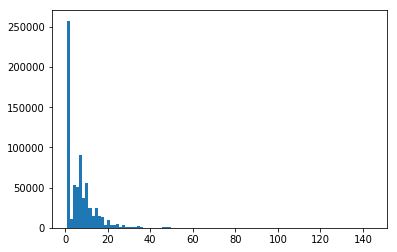

In [87]:
plt.hist(sample_counts.values, bins = 100)
plt.show()

# Sample Generation

# Convert Pandas dataframe to LSTM 3D tensor

# Set Threshold

In [88]:
thresholdd = 1

In [89]:
sum(sample_counts.values>=thresholdd)

684923

In [90]:
### Decision: Number of timesteps per sample = 3
# Shape of 3D matrix should be (#samples)x(3)x(132)

sum(sample_counts.values<thresholdd)

0

In [91]:
# Delete rows of JobIDs with  fewer than 3 timestamps

dff = raw_samples['JobID'].value_counts()
print(dff.sample(3))

32730316    1
38182925    4
37864081    1
Name: JobID, dtype: int64


In [ ]:
dff = dff[dff<thresholdd]


dff = dff.reset_index()
dff = dff.rename(index=str, columns={"JobID": "count", "index": "JobID"})

print(dff.sample(5))
print(dff.head())

remove_list = dff['JobID'].tolist()
remove_list[:5]

In [93]:
remove_list=[]

In [94]:
# THis CLEANED is not the final one, 
# Go forward to see : this is just an initialization

cleaned = raw_samples[~raw_samples['JobID'].isin(remove_list)]
cleaned.shape, raw_samples.shape

((4742707, 330), (4742707, 330))

In [95]:
# Number of unique JobIDs in cleaned
totalleftjobslist = cleaned.JobID.unique().tolist()

totalleftjobs = len(cleaned.JobID.unique().tolist())

In [96]:
import random

indices = random.sample(range(len(totalleftjobslist)), int(totalleftjobs * .50))
takeoutlist = [totalleftjobslist[i] for i in sorted(indices)]

len(takeoutlist), totalleftjobs 

(342461, 684923)

In [97]:
print(len(remove_list))
remove_list = remove_list + takeoutlist
print(len(remove_list))

0
342461


# Train on cleaned, Test on takeoutdf

In [98]:
cleaned = raw_samples[~raw_samples['JobID'].isin(remove_list)]
cleaned.shape, raw_samples.shape

((2365109, 330), (4742707, 330))

In [266]:
with open('large_cleaned_for_training.pickle', 'wb') as handle:
    pickle.dump(cleaned, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [99]:
takeoutdf = raw_samples[raw_samples['JobID'].isin(takeoutlist)]
takeoutdf.shape, raw_samples.shape

((2377598, 330), (4742707, 330))

In [267]:
with open('large_takeoutdf_for_testing.pickle', 'wb') as handle:
    pickle.dump(takeoutdf, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [100]:
######################

In [101]:
# Count values in cleaned

cleaned_counts = pd.value_counts(cleaned['JobID'].values, sort=False)
sum(cleaned_counts.values<thresholdd), sum(cleaned_counts.values>=thresholdd)

(0, 342462)

In [102]:
len((sample_counts.values))

684923

In [103]:
train_feat = cleaned.columns.tolist()
print(len(train_feat)) #125
cleaned.Status_Failed.value_counts()

330


0    1634854
1     730255
Name: Status_Failed, dtype: int64

In [104]:
# Build Training Features

In [105]:
cleaned.shape

(2365109, 330)

In [106]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples_features(df_input):
    
    k = thresholdd
    input_cols = train_feat
    
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input[input_cols].apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

In [107]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [108]:
thresholdd #Check it matched the title

1

# Build X (each job separately)

In [109]:
cleaned.shape

(2365109, 330)

In [27]:
with open('large_cleaned_for_train_samples_2374144by330.pickle', 'rb') as handle:
    cleaned = pickle.load(handle)

In [110]:
##################################################

In [28]:
cleaned.shape

(2374144, 330)

In [110]:
cleaned.isnull().values.ravel().sum()

410

In [111]:
cleaned = cleaned.dropna()

In [112]:
cleaned.isnull().values.ravel().sum()

0

In [ ]:
cleaned.columns.tolist()

In [32]:
##################################################

In [113]:
cols = cleaned.columns.tolist()

In [114]:
train_feat = cleaned.columns.tolist()
print(len(train_feat)) #125

train_feat.remove('HeartBeatTime')
train_feat.remove('JobID')
train_feat.remove('Status_Failed')


### Extra removal after noticing high accuracy
train_feat.remove('hbeat_start')
train_feat.remove('start_submit')
train_feat.remove('WallClockTime')

for c in cols:
    if 'JobGroup' in c:
        train_feat.remove(c)
##############################################

len(train_feat) #122

330


65

In [115]:
%%time
cleanedgrouped = cleaned.groupby('JobID')

CPU times: user 634 µs, sys: 4.09 ms, total: 4.73 ms
Wall time: 4.74 ms


In [116]:
print(thresholdd), cleaned.shape

1


(None, (2364904, 330))

In [36]:
print(thresholdd), cleaned.shape

1


(None, (2373924, 330))

In [ ]:
train_feat

## Cleaned df to 3D tensor

### Make X

In [118]:
import pandas as pd
from joblib import Parallel, delayed
import multiprocessing

multiprocessing.cpu_count()

24

In [119]:

def applyParallel(dfGrouped, func):
    retLst = Parallel(n_jobs=multiprocessing.cpu_count())(delayed(func)(group) for name, group in dfGrouped)
    return retLst

In [120]:
%%time

collecttrain = applyParallel(cleanedgrouped, samples_features)

CPU times: user 5min 14s, sys: 29.5 s, total: 5min 43s
Wall time: 7min 12s


In [122]:
%%time

# See if you can read a stored version
collecttrain = cleanedgrouped.apply(samples_features)

CPU times: user 23min 39s, sys: 13.1 s, total: 23min 52s
Wall time: 23min 58s


In [124]:
collecttrain.shape

(342401,)

In [44]:
len(collecttrain)

342401

In [121]:
len(collecttrain)

342405

In [ ]:
# >> Start here for importing training and test data

In [75]:
import pickle

with open('large_collecttrain.pickle', 'wb') as handle:
    pickle.dump(collecttrain, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
import pickle

with open('large_collecttrain.pickle', 'rb') as handle:
    collecttrain = pickle.load(handle)

In [122]:
collecttrain.shape

AttributeError: 'list' object has no attribute 'shape'

In [127]:
for f in collecttrain.tolist()[100]:
    print(f)
    print('***********************')

[[5.87734625e-03 3.38586439e-05 5.52050157e-02 2.43940947e-01
  5.00638193e-04 7.01959883e-03 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

### Unpack X from output of function

In [123]:
X=[]

In [124]:
%%time
for x in collecttrain:
    #len(x)
    for i in x:
        X.append(i)

CPU times: user 1.51 s, sys: 405 ms, total: 1.91 s
Wall time: 1.91 s


In [125]:
X = np.array(X)
X.shape

(2364904, 1, 65)

In [47]:
X = np.array(X)
X.shape

(2373924, 1, 65)

In [48]:
## X is ready (Y)

## Make Y

In [126]:
# Label Column ('Status_Failed' is the label column)
label_col = ['Status_Failed']

In [127]:
# Takes a df and converts it to 3D tensor
# Each sample will have k time steps

def samples_label(df_input):
    
    k = thresholdd
    input_cols = label_col
    
    
    # takes a df
    # Put your inputs into a single list
    
    df = pd.DataFrame()
    
    df['single_input_vector'] = df_input[input_cols].apply(tuple, axis=1).apply(list)
    
    # Double-encapsulate list so that you can sum it in the next step and keep time steps as separate elements
    df['single_input_vector'] = df.single_input_vector.apply(lambda x: [list(x)])
        
    # The starting point
    df['cumulative_input_vectors'] = df['single_input_vector'].shift(0)
    
    for i in range(1,k):
        df['cumulative_input_vectors'] += df['single_input_vector'].shift(i)
          
    df.dropna(inplace=True)     # does operation in place & returns None

    # Extract your training data
    X_ = np.asarray(df.cumulative_input_vectors)
    
    # Use hstack to and reshape to make the inputs a 3d vector
    X = np.vstack(X_).reshape(len(df), k, len(input_cols))
    
    # Clean up
    del df
    
    return X
    # returns 3D array

#### Build Y (each job separately)

In [128]:
cleanedgrouped = cleaned.groupby('JobID')

In [129]:
label_col

['Status_Failed']

In [130]:
%%time

collectlabel = applyParallel(cleanedgrouped, samples_label)

CPU times: user 5min 55s, sys: 32.5 s, total: 6min 27s
Wall time: 7min 52s


In [136]:
%%time
# See if you can read from pickle file

collectlabel = cleanedgrouped.apply(samples_label)

CPU times: user 22min 36s, sys: 21.2 s, total: 22min 57s
Wall time: 23min 1s


In [74]:
import pickle

with open('large_collectlabel.pickle', 'wb') as handle:
    pickle.dump(collectlabel, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
with open('large_collectlabel.pickle', 'rb') as handle:
    collectlabel = pickle.load(handle)

In [132]:
collectlabel[:1]

[array([[[1]]])]

In [56]:
len(collectlabel)

342401

In [133]:
len(collectlabel)

342405

In [21]:
collectlabel.shape

(342398,)

In [21]:
### Unpack Y from output of function

In [134]:
Y=[]

In [135]:
%%time
for x in collectlabel:
    #len(x)
    for i in x:
        Y.append(i)

CPU times: user 1.28 s, sys: 269 ms, total: 1.54 s
Wall time: 1.54 s


In [136]:
Y = np.array(Y)
Y.shape

(2364904, 1, 1)

In [137]:
X.shape

(2364904, 1, 65)

In [138]:
YY = np.array([x[0][0] for x in Y]).reshape(len(Y),1)
YY.shape

(2364904, 1)

In [139]:
YY[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [140]:
## Y is ready
thresholdd = 1

In [141]:
X.shape, YY.shape

((2364904, 1, 65), (2364904, 1))

In [142]:
X.shape, YY.shape

((2364904, 1, 65), (2364904, 1))

## Shuffle X,Y in Unison

In [143]:
# Unison shuffle
def unison_shuffled_copies(a, b):
    import numpy as np
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [144]:
%%time
X_final, Y_final = unison_shuffled_copies(X,YY)

CPU times: user 485 ms, sys: 318 ms, total: 803 ms
Wall time: 803 ms


In [145]:
X_final.shape, Y_final.shape

((2364904, 1, 65), (2364904, 1))

In [146]:
sum(Y_final[:10000])

array([3055])

del X
del Y
del YY

In [147]:
X_final, Y_final = unison_shuffled_copies(X_final, Y_final)

In [148]:
Y_final[:10]

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])

# Start: Build test set from 'takeoutdf'

## Build X_test, Y_test using each JobID separately

In [46]:
takeoutdf = pd.read_pickle('takeoutdf_for_test_samples.pickle')
takeoutdf.shape

(202677, 316)

In [72]:
takeoutdf = pd.read_pickle('takeoutdf_for_test_samples.pickle')
takeoutdf.shape

(202677, 316)

In [149]:
takeoutdf.Status_Failed.value_counts()

0    1644526
1     733072
Name: Status_Failed, dtype: int64

In [73]:
takeoutdf.Status_Failed.value_counts()

0    107243
1     95434
Name: Status_Failed, dtype: int64

In [153]:
# Training Features

In [150]:
print(len(train_feat)) 

65


In [155]:
(train_feat)

['AvailableDiskSpace',
 'CPUConsumed',
 'LoadAverage',
 'MemoryUsed',
 'RSS',
 'Vsize',
 'RescheduleCounter',
 'JobType_MCProductionBGx0',
 'JobType_Merge',
 'Site_ARC.DESY.de',
 'Site_ARC.SIGNET.si',
 'Site_CLOUD.AWS_Sydney.au',
 'Site_CLOUD.AWS_Tokyo.jp',
 'Site_CLOUD.AWS_Virginia.us',
 'Site_CLOUD.CC1_Krakow.pl',
 'Site_DIRAC.BINP.ru',
 'Site_DIRAC.Beihang.cn',
 'Site_DIRAC.CINVESTAV.mx',
 'Site_DIRAC.Hokudai.jp',
 'Site_DIRAC.IITG.in',
 'Site_DIRAC.MIPT.ru',
 'Site_DIRAC.Nagoya.jp',
 'Site_DIRAC.Nara-WU.jp',
 'Site_DIRAC.Niigata.jp',
 'Site_DIRAC.Osaka-CU.jp',
 'Site_DIRAC.PNNL.us',
 'Site_DIRAC.RCNP.jp',
 'Site_DIRAC.TIFR.in',
 'Site_DIRAC.TMU.jp',
 'Site_DIRAC.Test.jp',
 'Site_DIRAC.Tokyo.jp',
 'Site_DIRAC.UAS.mx',
 'Site_DIRAC.UVic.ca',
 'Site_DIRAC.Yamagata.jp',
 'Site_DIRAC.Yonsei.kr',
 'Site_Group.KEK2.jp',
 'Site_LCG.CESNET.cz',
 'Site_LCG.CNAF.it',
 'Site_LCG.CYFRONET.pl',
 'Site_LCG.Cosenza.it',
 'Site_LCG.DESY.de',
 'Site_LCG.Frascati.it',
 'Site_LCG.HEPHY.at',
 'Site_LCG

In [151]:
takeoutdf.WallClockTime.tolist()[:5]

[2.199088425903163e-06,
 0.007000830256661021,
 0.013993450619074732,
 0.020992312679302173,
 0.02798683263427591]

In [152]:
# Label Column ('Status_Failed' is the label column)
print(label_col)

['Status_Failed']


In [153]:
takeoutdf.shape

(2377598, 330)

In [154]:
takeoutdf.isnull().values.ravel().sum()

466

In [155]:
takeoutdf = takeoutdf.dropna()

In [156]:
takeoutdf.isnull().values.ravel().sum()

0

In [157]:
takeoutdf.columns

Index(['JobID', 'HeartBeatTime', 'AvailableDiskSpace', 'CPUConsumed',
       'LoadAverage', 'MemoryUsed', 'RSS', 'Vsize', 'WallClockTime',
       'RescheduleCounter',
       ...
       'Site_LCG.Torino.it', 'Site_LCG.ULAKBIM.tr', 'Site_Multiple',
       'Site_SSH.KMI.jp', 'Status_Failed', 'UserPriority_2', 'UserPriority_3',
       'UserPriority_5', 'UserPriority_9', 'UserPriority_10'],
      dtype='object', length=330)

########################################################
takeoutdf.to_pickle('takeoutdf_for_test_samples.pickle')
########################################################

###  Make X_test

In [158]:
takeoutdfgrouped = takeoutdf.groupby('JobID')

In [159]:
%%time
collectXtest = applyParallel(takeoutdfgrouped, samples_features)

CPU times: user 5min 31s, sys: 24.4 s, total: 5min 55s
Wall time: 7min 23s


In [164]:
%%time
collectXtest = takeoutdfgrouped.apply(samples_features)

CPU times: user 23min 21s, sys: 7.56 s, total: 23min 29s
Wall time: 23min 30s


In [165]:
with open('large_collectXtest.pickle', 'wb') as handle:
    pickle.dump(collectXtest, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [160]:
# Testcase 1 of function sample_features:

check = 0
j_checks = takeoutdf.JobID.sample(20)

for k in j_checks:
    
    v = takeoutdfgrouped.get_group(k)
    
    if(True):
        #print(v.columns.tolist())
        A = np.array(v)
        #print(train_feat)
        B = samples_features(v)
        check += 1
        
        if(len(A) == len(B)):
            print(k, 'Lengths match')
        
        # Tests
        for x,y in zip(A,B):
            #print(x)
            #print(y)
            
            if not (np.all([ m==n for (m,n) in zip(x[2:8] , y[0][0:6]) ])):
                print(k, 'NOK')
                
    if(check == len(j_checks)):
        break

32495688 Lengths match
32300804 Lengths match
37223818 Lengths match
32622696 Lengths match
37065321 Lengths match
37610281 Lengths match
33187208 Lengths match
32558373 Lengths match
32525232 Lengths match
32444135 Lengths match
32276757 Lengths match
32404669 Lengths match
37412086 Lengths match
32739991 Lengths match
32382660 Lengths match
32397899 Lengths match
37478341 Lengths match
37259407 Lengths match
32623709 Lengths match
37726553 Lengths match


In [161]:
takeoutdf.head(40)

JobID       HeartBeatTime  AvailableDiskSpace  CPUConsumed  \
29  23205539 2015-08-08 22:50:06            0.000498     0.000008   
30  23205539 2015-08-08 23:20:07            0.000497     0.005948   
31  23205539 2015-08-08 23:50:08            0.000497     0.012257   
32  23205539 2015-08-09 00:20:09            0.000497     0.019032   
33  23205539 2015-08-09 00:50:10            0.000497     0.025793   
34  23205539 2015-08-09 01:20:07            0.000497     0.032553   
35  23205539 2015-08-09 01:50:07            0.000497     0.039325   
36  23205539 2015-08-09 02:20:08            0.000497     0.046097   
37  23205539 2015-08-09 02:50:07            0.000497     0.052812   
38  23205539 2015-08-09 03:20:07            0.000497     0.059283   
39  23205539 2015-08-09 03:50:08            0.000497     0.065174   
40  23205539 2015-08-09 04:20:08            0.000498     0.071920   
41  23205539 2015-08-09 04:50:08            0.000498     0.078691   
42  23205643 2015-08-08 22:50:00            0.002151     0.000030   
43  23205643 2015-08-08 23:20:01            0.002150     0.006463   
44  23205643 2015-08-08 23:50:00            0.002149     0.013179   
45  23205643 2015-08-09 00:20:00            0.002148     0.019732   
46  23205643 2015-08-09 00:50:04            0.002147     0.026353   
47  23205643 2015-08-09 01:20:01            0.002146     0.033046   
48  23205643 2015-08-09 01:50:03            0.002145     0.039690   
49  23205643 2015-08-09 02:20:03            0.002144     0.046292   
50  23205643 2015-08-09 02:50:02            0.002144     0.052872   
51  23205643 2015-08-09 03:20:05            0.002144     0.059561   
52  23205643 2015-08-09 03:50:01            0.002142     0.066228   
53  23205643 2015-08-09 04:20:04            0.002141     0.072826   
54  23205643 2015-08-09 04:50:07            0.002140     0.079391   
55  23205643 2015-08-09 05:20:06            0.002140     0.086099   
56  23205643 2015-08-09 05:50:02            0.002139     0.092784   
57  23205643 2015-08-09 06:20:03            0.002138     0.099458   
58  23205643 2015-08-09 06:50:01            0.002146     0.106083   
59  23205643 2015-08-09 07:20:03            0.002145     0.112689   
60  23205643 2015-08-09 07:50:02            0.002153     0.119337   
61  23205643 2015-08-09 08:20:02            0.002153     0.126029   
62  23205643 2015-08-09 08:50:03            0.002152     0.132673   
63  23205643 2015-08-09 09:20:06            0.002151     0.139347   
64  23205643 2015-08-09 09:50:02            0.002151     0.146002   
65  23205643 2015-08-09 10:20:05            0.002150     0.152706   
66  23205643 2015-08-09 10:50:02            0.002158     0.159373   
67  23205643 2015-08-09 11:20:01            0.002156     0.166073   
68  23205643 2015-08-09 11:50:02            0.002156     0.172792   

    LoadAverage  MemoryUsed       RSS     Vsize  WallClockTime  \
29     0.022835    0.089497  0.000295  0.002542       0.000002   
30     0.027002    0.097032  0.004706  0.012162       0.007001   
31     0.026581    0.094595  0.004929  0.012389       0.013993   
32     0.026200    0.095478  0.005136  0.012597       0.020992   
33     0.024217    0.096853  0.005286  0.013117       0.027987   
34     0.024057    0.094305  0.005462  0.013289       0.034971   
35     0.024137    0.095746  0.005605  0.013430       0.041964   
36     0.024257    0.097337  0.006186  0.013996       0.048958   
37     0.025279    0.097736  0.006046  0.014153       0.055949   
38     0.026180    0.096338  0.006208  0.014286       0.062941   
39     0.026481    0.097492  0.006331  0.014404       0.069936   
40     0.022435    0.091498  0.006507  0.014603       0.076926   
41     0.022755    0.088357  0.006792  0.014885       0.083921   
42     0.045530    0.158091  0.000305  0.004432       0.000012   
43     0.049316    0.162162  0.004673  0.015920       0.007010   
44     0.049316    0.165052  0.004786  0.016799       0.013997   
45     0.048975    0.169356  0.004692  0.016914       0

In [163]:
collectXtest[100].shape

(27, 1, 65)

### Unpack X_test

In [164]:
X_test=[]

In [165]:
%%time
for x in collectXtest:
    #len(x)
    for i in x:
        X_test.append(i)

CPU times: user 1.28 s, sys: 361 ms, total: 1.64 s
Wall time: 1.64 s


In [170]:
X_test = np.array(X_test)
X_test.shape

(2368345, 1, 65)

In [166]:
X_test = np.array(X_test)
X_test.shape

(2377365, 1, 65)

In [167]:
## X_test is ready

### Make Y_test

In [168]:
%%time
collecttestlabel = applyParallel(takeoutdfgrouped, samples_label)

CPU times: user 5min 53s, sys: 47.6 s, total: 6min 40s
Wall time: 7min 11s


In [172]:
%%time
collectlabel = takeoutdfgrouped.apply(samples_label)

CPU times: user 22min 8s, sys: 14.4 s, total: 22min 23s
Wall time: 22min 25s


In [170]:
len(collecttestlabel)

342394

In [174]:
with open('large_collectlabel.pickle', 'wb') as handle:
    pickle.dump(collectlabel, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Unpack Y_test

In [171]:
Y_t=[]

In [172]:
%%time
for x in collecttestlabel:
    #len(x)
    for i in x:
        Y_t.append(i)

CPU times: user 1.24 s, sys: 357 ms, total: 1.6 s
Wall time: 1.6 s


In [173]:
Y_t = np.array(Y_t)
Y_t.shape

(2377365, 1, 1)

In [177]:
Y_test = np.array([x[0][0] for x in Y_t]).reshape(len(Y_t),1)
Y_test.shape

(2377365, 1)

In [178]:
Y_test[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [179]:
## Y_test is ready

In [180]:
X_test.shape, Y_test.shape

((2377365, 1, 65), (2377365, 1))

In [181]:
X_final.shape, Y_final.shape

((2364904, 1, 65), (2364904, 1))

In [182]:
sum(Y_test[:]), len(Y_test)

(array([732839]), 2377365)

In [183]:
del Y_t

In [200]:
with open('large_X_final.pickle', 'wb') as handle:
    pickle.dump(X_final, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('large_Y_final.pickle', 'wb') as handle:
    pickle.dump(Y_final, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('large_X_test.pickle', 'wb') as handle:
    pickle.dump(X_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('large_Y_test.pickle', 'wb') as handle:
    pickle.dump(Y_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [201]:
X_test.shape, Y_test.shape

((2377365, 1, 65), (2377365, 1))

In [202]:
X_final.shape, Y_final.shape

((2364904, 1, 65), (2364904, 1))

# End test set from 'takeoutdf'

## Build Model

In [184]:
input_length = X_final.shape[1]

input_dim = X_final.shape[2]

# Output dimensions is the shape of a single output vector
# In this case it's just 1, but it could be more
output_dim = len(Y_final[0])

In [185]:
# NO NEED TO SPLIT, SINCE TESTING WILL OCCUR ON leftoutdf taken out earlier

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_final,Y_final,test_size=0.33,random_state=24)

In [186]:
#X_train.shape,y_train.shape, X_test.shape,  y_test.shape

In [187]:
sum([x[0] for x in Y_final])/ len(Y_final)

0.30870174856992083

In [188]:
Y_final[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [189]:
from keras.models import Model, Sequential
from keras.layers import LSTM, Dense, Embedding, Dropout
input_dim, input_length, output_dim

/data/home/a1singh/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(65, 1, 1)

In [194]:
# Model 1

def create_model1(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model 1...')
    model = Sequential()
    model.add(LSTM(20, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(20))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

In [195]:
# Model 2

def create_model2(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model 2...')
    model = Sequential()
    model.add(LSTM(50, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(50, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(50, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

In [196]:
# Model 3

def create_model3(input_dim = input_dim, input_length = input_length, output_dim=output_dim):
    print ('Creating model 3...')
    model = Sequential()
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100, input_shape=(input_length,input_dim),return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(output_dim, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])
    return model

# Model 1

In [214]:
model1 = create_model1()

Creating model 1...
Compiling...


In [215]:
%%time

print ('Fitting model...')
history = model1.fit(X_final,Y_final,batch_size=250, epochs=100, validation_split = 0.10, verbose = 1)

Fitting model...
Train on 2128413 samples, validate on 236491 samples
Epoch 1/100
2128413/2128413 [==============================] - 63s 30us/step - loss: 0.1836 - binary_accuracy: 0.9349 - val_loss: 0.1578 - val_binary_accuracy: 0.9451
Epoch 2/100
2128413/2128413 [==============================] - 65s 30us/step - loss: 0.1503 - binary_accuracy: 0.9515 - val_loss: 0.1410 - val_binary_accuracy: 0.9546
Epoch 3/100
2128413/2128413 [==============================] - 64s 30us/step - loss: 0.1375 - binary_accuracy: 0.9563 - val_loss: 0.1279 - val_binary_accuracy: 0.9594
Epoch 4/100
2128413/2128413 [==============================] - 65s 30us/step - loss: 0.1233 - binary_accuracy: 0.9615 - val_loss: 0.1153 - val_binary_accuracy: 0.9642
Epoch 5/100
2128413/2128413 [==============================] - 63s 30us/step - loss: 0.1129 - binary_accuracy: 0.9645 - val_loss: 0.1089 - val_binary_accuracy: 0.9660
Epoch 6/100
2128413/2128413 [==============================] - 65s 31us/step - loss: 0.1076 - b

Epoch 98/100
2128413/2128413 [==============================] - 70s 33us/step - loss: 0.0799 - binary_accuracy: 0.9763 - val_loss: 0.0787 - val_binary_accuracy: 0.9767
Epoch 99/100
2128413/2128413 [==============================] - 70s 33us/step - loss: 0.0799 - binary_accuracy: 0.9762 - val_loss: 0.0788 - val_binary_accuracy: 0.9769
Epoch 100/100
2128413/2128413 [==============================] - 71s 33us/step - loss: 0.0797 - binary_accuracy: 0.9763 - val_loss: 0.0796 - val_binary_accuracy: 0.9765
CPU times: user 6h 41min 43s, sys: 1h 32min 5s, total: 8h 13min 49s
Wall time: 1h 49min 8s


In [216]:
loss, accuracy = model1.evaluate(X_test, Y_test)

2377365/2377365 [==============================] - 163s 69us/step


# Accuracy

In [217]:
loss, accuracy

(0.08330490854047193, 0.9755018686655184)

In [196]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [218]:
y_pred = model1.predict(X_test)

In [219]:
model1.save('large_model1_tsteps1_features65_partII.pickle')

In [220]:
y_pred[15000:15010]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# Binary classification accuracy

In [221]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [222]:
np.mean(np.equal(y_true, y_predicted))

0.9755018686655184

# Confusion matrix

In [223]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0.0     1.0      All
True                               
0          1633711   10815  1644526
1            47426  685413   732839
All        1681137  696228  2377365

In [202]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0.0     1.0      All
True                               
0          1628955    9155  1638110
1            48481  681754   730235
All        1677436  690909  2368345

In [222]:
# Worst case error bound on JobID specific 'Status' prediction error:

100*(9155+48481)/2368345

2.433598145540451

In [224]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

(342394, 342405)

In [225]:
sum(takeoutdf["JobID"].value_counts()==1)

118282

In [226]:
len(X_test[(y_true==1) & (y_predicted==0)])

47426

In [227]:
# Verify that there is no intersection between training and test jobs

list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

[]

In [228]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

(696228.0, 2377365)

In [229]:
#### Model 2 Start

# Model 2

In [230]:
model2 = create_model2()

Creating model 2...
Compiling...


In [231]:
%%time

print ('Fitting model...')
history = model2.fit(X_final,Y_final,batch_size=250, epochs=100, validation_split = 0.10, verbose = 1)

Fitting model...
Train on 2128413 samples, validate on 236491 samples
Epoch 1/100
2128413/2128413 [==============================] - 130s 61us/step - loss: 0.1715 - binary_accuracy: 0.9410 - val_loss: 0.1394 - val_binary_accuracy: 0.9560
Epoch 2/100
2128413/2128413 [==============================] - 164s 77us/step - loss: 0.1321 - binary_accuracy: 0.9584 - val_loss: 0.1167 - val_binary_accuracy: 0.9639
Epoch 3/100
2128413/2128413 [==============================] - 164s 77us/step - loss: 0.1158 - binary_accuracy: 0.9637 - val_loss: 0.1147 - val_binary_accuracy: 0.9641
Epoch 4/100
2128413/2128413 [==============================] - 165s 78us/step - loss: 0.1111 - binary_accuracy: 0.9655 - val_loss: 0.1146 - val_binary_accuracy: 0.9646
Epoch 5/100
2128413/2128413 [==============================] - 164s 77us/step - loss: 0.1087 - binary_accuracy: 0.9661 - val_loss: 0.1067 - val_binary_accuracy: 0.9668
Epoch 6/100
2128413/2128413 [==============================] - 161s 76us/step - loss: 0.10

2128413/2128413 [==============================] - 165s 78us/step - loss: 0.0714 - binary_accuracy: 0.9791 - val_loss: 0.0717 - val_binary_accuracy: 0.9791
Epoch 98/100
2128413/2128413 [==============================] - 167s 79us/step - loss: 0.0712 - binary_accuracy: 0.9791 - val_loss: 0.0738 - val_binary_accuracy: 0.9782
Epoch 99/100
2128413/2128413 [==============================] - 166s 78us/step - loss: 0.0713 - binary_accuracy: 0.9791 - val_loss: 0.0716 - val_binary_accuracy: 0.9793
Epoch 100/100
2128413/2128413 [==============================] - 166s 78us/step - loss: 0.0713 - binary_accuracy: 0.9791 - val_loss: 0.0725 - val_binary_accuracy: 0.9787
CPU times: user 20h 50min 25s, sys: 3h 18min 20s, total: 1d 8min 46s
Wall time: 4h 34min 53s


In [232]:
loss, accuracy = model2.evaluate(X_test, Y_test)

2377365/2377365 [==============================] - 281s 118us/step


# Accuracy

In [233]:
loss, accuracy

(0.07895959072743663, 0.977438887171301)

In [234]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [235]:
y_pred = model2.predict(X_test)

In [236]:
## Save

In [237]:
model2.save('large_model2_tsteps1_features65_partII.pickle')

In [238]:
y_pred[15000:15010]

array([[0.9999851],
       [0.9999926],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ],
       [1.       ]], dtype=float32)

# Binary classification accuracy

In [239]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [240]:
np.mean(np.equal(y_true, y_predicted))

0.977438887171301

# Confusion matrix

In [241]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0.0     1.0      All
True                               
0          1633965   10561  1644526
1            43075  689764   732839
All        1677040  700325  2377365

In [202]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0.0     1.0      All
True                               
0          1628955    9155  1638110
1            48481  681754   730235
All        1677436  690909  2368345

In [320]:
# Worst case error bound on JobID specific 'Status' prediction error:

100*(7618+46967)/2368345

2.3047740088542845

In [242]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

(342394, 342405)

In [243]:
sum(takeoutdf["JobID"].value_counts()==1)

118282

In [244]:
len(X_test[(y_true==1) & (y_predicted==0)])

43075

In [245]:
# Verify that there is no intersection between training and test jobs

list(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

[]

In [246]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

(700325.0, 2377365)

In [247]:
#### Model 2 End

In [ ]:
#### Model 3 Start

# Model 3

In [248]:
model3 = create_model3()

Creating model 3...
Compiling...


In [249]:
%%time

print ('Fitting model...')
history = model3.fit(X_final,Y_final,batch_size=250, epochs=100, validation_split = 0.10, verbose = 1)

Fitting model...
Train on 2128413 samples, validate on 236491 samples
Epoch 1/100
2128413/2128413 [==============================] - 272s 128us/step - loss: 0.1689 - binary_accuracy: 0.9430 - val_loss: 0.1335 - val_binary_accuracy: 0.9577
Epoch 2/100
2128413/2128413 [==============================] - 272s 128us/step - loss: 0.1292 - binary_accuracy: 0.9593 - val_loss: 0.1148 - val_binary_accuracy: 0.9640
Epoch 3/100
2128413/2128413 [==============================] - 271s 128us/step - loss: 0.1152 - binary_accuracy: 0.9641 - val_loss: 0.1041 - val_binary_accuracy: 0.9682
Epoch 4/100
2128413/2128413 [==============================] - 270s 127us/step - loss: 0.1061 - binary_accuracy: 0.9670 - val_loss: 0.0981 - val_binary_accuracy: 0.9698
Epoch 5/100
2128413/2128413 [==============================] - 271s 127us/step - loss: 0.1025 - binary_accuracy: 0.9682 - val_loss: 0.0966 - val_binary_accuracy: 0.9699
Epoch 6/100
2128413/2128413 [==============================] - 271s 127us/step - loss

Epoch 49/100
2128413/2128413 [==============================] - 271s 127us/step - loss: 0.0747 - binary_accuracy: 0.9778 - val_loss: 0.0752 - val_binary_accuracy: 0.9778
Epoch 50/100
2128413/2128413 [==============================] - 267s 126us/step - loss: 0.0745 - binary_accuracy: 0.9779 - val_loss: 0.0740 - val_binary_accuracy: 0.9783
Epoch 51/100
2128413/2128413 [==============================] - 264s 124us/step - loss: 0.0744 - binary_accuracy: 0.9779 - val_loss: 0.0763 - val_binary_accuracy: 0.9776
Epoch 52/100
2128413/2128413 [==============================] - 262s 123us/step - loss: 0.0742 - binary_accuracy: 0.9780 - val_loss: 0.0741 - val_binary_accuracy: 0.9782
Epoch 53/100
2128413/2128413 [==============================] - 259s 121us/step - loss: 0.0740 - binary_accuracy: 0.9780 - val_loss: 0.0745 - val_binary_accuracy: 0.9782
Epoch 54/100
2128413/2128413 [==============================] - 240s 113us/step - loss: 0.0740 - binary_accuracy: 0.9781 - val_loss: 0.0735 - val_bina

In [250]:
loss, accuracy = model3.evaluate(X_test, Y_test)

2377365/2377365 [==============================] - 436s 183us/step


# Accuracy

In [251]:
loss, accuracy

(0.08536106343103582, 0.9759498436293964)

In [252]:
# when taking 10 timesteps, and keeping separate test and training JobIDs
# loss, accuracy is: 
# on X_test, Y_test

In [253]:
y_pred = model3.predict(X_test)

In [254]:
y_pred[15000:15010]

array([[0.9999957 ],
       [0.99999094],
       [0.99996936],
       [0.9999888 ],
       [0.99999154],
       [0.9999931 ],
       [0.9999974 ],
       [0.9999949 ],
       [0.9999981 ],
       [0.999998  ]], dtype=float32)

## Save Model 3

In [268]:
model3.save('large_model3_tsteps1_features65_partII.pickle')

# Binary classification accuracy

In [256]:
y_true = pd.Series([x[0] for x in Y_test])

# Use np.rint for rounding off 
y_predicted = pd.Series([ np.rint(j[0]) for j in y_pred])

In [257]:
np.mean(np.equal(y_true, y_predicted))

0.9759498436293964

# Confusion matrix

In [258]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0.0     1.0      All
True                               
0          1631338   13188  1644526
1            43988  688851   732839
All        1675326  702039  2377365

In [202]:
pd.crosstab(y_true, y_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted      0.0     1.0      All
True                               
0          1628955    9155  1638110
1            48481  681754   730235
All        1677436  690909  2368345

In [321]:
# Worst case error bound on JobID specific 'Status' prediction error:

100*(7440+45791)/2368345

2.247603284149902

In [259]:
len(takeoutdf.JobID.unique().tolist()), len(cleaned.JobID.unique().tolist())

(342394, 342405)

In [260]:
sum(takeoutdf["JobID"].value_counts()==1)

118282

In [261]:
len(X_test[(y_true==1) & (y_predicted==0)])

43988

In [262]:
# Verify that there is no intersection between training and test jobs

len(set(takeoutdf.JobID.tolist()) & set(cleaned.JobID.tolist()))

0

In [263]:
len(set(takeoutdf.JobID.tolist())), len(set(cleaned.JobID.tolist()))

(342394, 342405)

In [264]:
# Predicting all 0s ??
sum([ (j) for j in y_predicted]), len(y_predicted)

(702039.0, 2377365)

In [265]:
#### Model 3 End

# Checkpoint: Valid code above this line

In [324]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [327]:
from keras.utils import plot_model
plot_model(model, to_file='model3.png')

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.